## Pythonで実践するグラフ因果推論入門
## 第3回：質的変数を含む因果モデルをSEMで構築
##（semopyでSEM構築）

url : https://www.salesanalytics.co.jp/datascience/datascience232/

前回の記事では、因果グラフであるDAGを、Pythonのsemopyライブラリを使い構造方程式モデリング（SEM）する方法についてお話ししました。

url: https://www.salesanalytics.co.jp/datascience/datascience231/

今回は、質的変数を含む因果モデルの取り扱いに焦点を当てます。

質的変数（カテゴリカルデータ）は、数値で表せない情報を持つデータです。

例えば、色、性別、職業などが挙げられます。

これらの変数は、単純な数値変数とは異なる取り扱いが必要であり、因果モデルにおいて重要な役割を果たします。

今回は、質的変数の種類とその扱い方を紹介し、質的変数が説明変数の場合の具体的な例を通じて、Pythonでの実践方法を学びます。

## 質的変数の種類とその扱い方
## 順序データと非順序データの違い

質的変数は大きく二種類に分類されます。

    順序データ
    非順序データ

## 順序データ（Ordinal Data）

このデータタイプは自然な順序を持ちますが、その間隔は一貫していない場合があります。

例えば……

    教育レベル（高卒、大学卒、大学院卒）
    満足度評価（非常に不満、不満、普通、満足、非常に満足）

……などです。

## 非順序データ（Nominal Data）

このデータタイプには順序がなく、単にカテゴリとしての意味を持ちます。

例えば……

    性別（男性、女性）
    血液型（A型、B型、O型、AB型）
    居住地（東京、大阪、名古屋）

……などです。

## 順序コーディングとダミーコーディング（OneHotEncode）

質的変数を数値データとして扱うためには、適切なコーディングが必要です。

順序データと非順序データそれぞれに適した方法があります。

## 順序コーディング（Ordinal Encoding）

順序データは、その順序を保持したまま整数値に変換することができます。

例えば、教育レベルのデータを以下のようにコーディングします。

    高卒：1
    大学卒：2
    大学院卒：3

## ダミーコーディング（OneHotEncode）

非順序データはダミー変数に変換することが一般的です。

これは、各カテゴリを二進法で表現する方法です。

例えば、性別データをダミーコーディングする場合、以下のようになります。

    男性：[1, 0]
    女性：[0, 1]

## Pythonでの実施例

以下は、Pythonのコード例です。

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# データの準備
data = {'education': ['high school', 'bachelor', 'master'],
        'gender': ['male', 'female', 'female']}
# データフレームに変換
df = pd.DataFrame(data)


# 順序コーディング
# カテゴリの順序を指定
order_categories = [['high school', 'bachelor', 'master']]

# インスタンス
ordinal_encoder = OrdinalEncoder(categories=order_categories)
# カテゴリ変数をエンコードし、dfに追加
df['education_encoded'] = ordinal_encoder.fit_transform(df[['education']])

# ダミーコーディング（OneHotEncoding）
# インスタンス
# - drop='first'は、最初のカテゴリを削除
# - sparse=Falseは、データをNumPy配列に変換
onehot_encoder = OneHotEncoder(drop='first', sparse=False)

# カテゴリ変数をエンコード
gender_encoded = onehot_encoder.fit_transform(df[['gender']])

# エンコードされた性別データの変数名を取得
gender_columns = onehot_encoder.get_feature_names_out(['gender'])

# カテゴリ変数をエンコードし、dfに追加
df[gender_columns] = gender_encoded

# エンコードされたデータフレームを表示
display(df)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,education,gender,education_encoded,gender_male
0,high school,male,0.0,1.0
1,bachelor,female,1.0,0.0
2,master,female,2.0,0.0


以下は、このコードの簡単な解説です。

    データの準備
dataという辞書を作成し、educationとgenderの2つのキーにそれぞれリストを割り当てます。

この辞書を使って、dfというデータフレームを作成します。

    順序コーディング

order_categoriesというリストを作成し、educationのカテゴリの順序を指定します。

OrdinalEncoderのインスタンスを作成し、categories引数にorder_categoriesを指定します。

education列をエンコードし、その結果をdfにeducation_encodedという新しい列として追加します。

    ダミーコーディング

OneHotEncoderのインスタンスを作成し、drop='first'とsparse=Falseを指定します。これにより、最初のカテゴリが削除され、結果がNumPy配列として返されます。

gender列をエンコードし、その結果をgender_encodedという変数に格納します。

エンコードされた性別データの変数名を取得し、gender_columnsという変数に格納します。エンコードされた性別データをdfに追加します。

    エンコードされたデータフレームを表示

最後に、エンコードされたデータフレームdfを表示します。

## 説明変数が質的変数の場合のSEM例
## サンプルデータセットの紹介

質的変数が説明変数として使用される場合、その取り扱いがモデルの精度に大きな影響を与えます。

ここでは、サンプルデータセットを用いて、質的変数をどのように処理するかを実践してみましょう。

この例では、顧客の購買データを使用します。

    gender：性別
    job：職業
    purchase_amount：購買金額

まず、サンプルデータを作ります。

以下、コードです。

In [2]:
pip install semopy

In [3]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from semopy import Model
import numpy as np

# サンプルデータの生成
# ランダムシードの設定
np.random.seed(42)

# サンプルデータの作成
data = {'gender': np.random.choice(['male', 'female'], 100),
        'job': np.random.choice(['engineer', 'doctor', 'shopkeeper'], 100),
        'purchase_amount': np.random.randint(10, 50, 100)}

# データフレームに変換
df = pd.DataFrame(data)

# purchase_amount列の値を調整
df['purchase_amount'] += (
    df['gender'].map({'male': 0, 'female': 10}) +
    df['job'].map({'engineer': 50, 'doctor': 20, 'shopkeeper': -10})
)

display(df)

,gender,job,purchase_amount
0,male,shopkeeper,27
1,female,doctor,67
2,male,doctor,49
3,male,doctor,59
4,male,doctor,40
...,...,...,...
95,female,engineer,88
96,female,doctor,55
97,female,engineer,72
98,female,engineer,89


## 質的変数のダミーコーディング（OneHotEncoding）

まず、以下の質的変数をコーディングします。

    性別：ダミーコーディング（OneHotEncoding）
    職業：ダミーコーディング（OneHotEncoding）


以下、コードです。

In [4]:
from sklearn.preprocessing import OneHotEncoder

# ダミーコーディング（OneHotEncoding）
# OneHotEncoderのインスタンスを作成
encoder = OneHotEncoder(drop='first', sparse=False)

# カテゴリ変数をエンコード
df_encoded = encoder.fit_transform(df[['gender', 'job']])

# エンコード後の変数名を取得
encoded_columns = encoder.get_feature_names_out(['gender', 'job'])

# エンコードされた変数をDataFrameに変換
df_encoded = pd.DataFrame(
    df_encoded,
    columns=encoded_columns
)

# purchase_amount列を追加
df_encoded = pd.concat([
    df_encoded,
    df[['purchase_amount']]
    ], axis=1
)

display(df_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,gender_male,job_engineer,job_shopkeeper,purchase_amount
0,1.0,0.0,1.0,27
1,0.0,0.0,0.0,67
2,1.0,0.0,0.0,49
3,1.0,0.0,0.0,59
4,1.0,0.0,0.0,40
...,...,...,...,...
95,0.0,1.0,0.0,88
96,0.0,0.0,0.0,55
97,0.0,1.0,0.0,72
98,0.0,1.0,0.0,89


## SEMモデルの構築

semopyを使用してモデルを定義し、学習します。

以下、コードです。

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,purchase_amount,~,gender_male,-12.383215,2.464952,-5.023715,5.068150e-07
1,purchase_amount,~,job_engineer,27.590445,3.167842,8.709539,0.000000e+00
2,purchase_amount,~,job_shopkeeper,-29.659814,3.081936,-9.623759,0.000000e+00
3,purchase_amount,~~,purchase_amount,147.176898,20.813956,7.071068,1.537437e-12


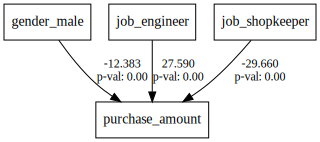

In [5]:
from semopy import Model
from semopy import plot

# SEMモデルの構築および学習
# SEMモデルの定義
model_desc = """
purchase_amount ~ gender_male + job_engineer + job_shopkeeper
"""

model = Model(model_desc)

# モデルの学習
model.fit(df_encoded)

# 結果の表示
display(model.inspect())

# DAGの表示
plot.semplot(model, 'output_semplot.png')

lval, op, rval, Estimate, Std. Err, z-value, p-valueの各項目は、構造方程式モデリング（SEM）の推定結果を表しています。

それぞれの意味は以下の通りです。

    lval（Left Variable）：
方程式の左辺にある変数、つまり目的変数（従属変数、結果変数）を示します。

    op（Operator）：
変数間の関係を示す演算子です。`~`は回帰関係（因果関係）を示し、`~~`は共分散または相関関係を示します。

    rval（Right Variable）：
方程式の右辺にある変数、つまり説明変数（独立変数、予測変数）を示します。

    Estimate（推定値）：
変数間の関係の強さを示す推定値です。例えば、回帰係数や共分散の値がここに表示されます。
    Std. Err（標準誤差）：
推定値の標準誤差を示します。これは推定値の不確実性を表します。

    z-value（z値）：
推定値を標準誤差で割った値です。これは標準正規分布に基づく統計量で、推定値がゼロからどれだけ離れているかを示します。

    p-value（p値）：
z値に基づくp値で、推定値が統計的に有意かどうかを示します。一般に、p値が0.05未満であれば統計的に有意とされます。

これらの項目を用いて、SEMの結果を解釈し、変数間の関係の強さや有意性を評価します。

出力されたグラフには、係数とp値（p value）が表示されています。

p値が1%(0.01)未満のとき1%有意、p値が5%(0.05)未満のとき5%有意、p値が10%(0.1)未満のとき10%有意などと言われます。

## モデルの適合度評価

因果モデルを構築した後、その適合度を評価することが重要です。

以下、コードです。

In [6]:
from semopy import calc_stats

# 適合度指標の計算
stats = calc_stats(model)
display(stats.T)

,Value
DoF,6.000000e+00
DoF Baseline,9.000000e+00
chi2,5.213205e-05
chi2 p-value,1.000000e+00
chi2 Baseline,2.140099e+02
CFI,1.029267e+00
GFI,9.999998e-01
AGFI,9.999996e-01
NFI,9.999998e-01
TLI,1.043900e+00


以下の基準で考えると、上手く適合していると判断できそうです。

    Chi-Square検定: p値が大きい（通常は0.05以上）と、モデルがデータに適合していると考えられる。
    CFI（Comparative Fit Index）: 値が0.90以上であれば良好とされる。
    RMSEA（Root Mean Square Error of Approximation）: 値が0.05以下であれば良好とされる。

次に、予測精度です。

以下、コードです。

Mean squared error:  147.18236961632002
R^2:  0.8175034310658518


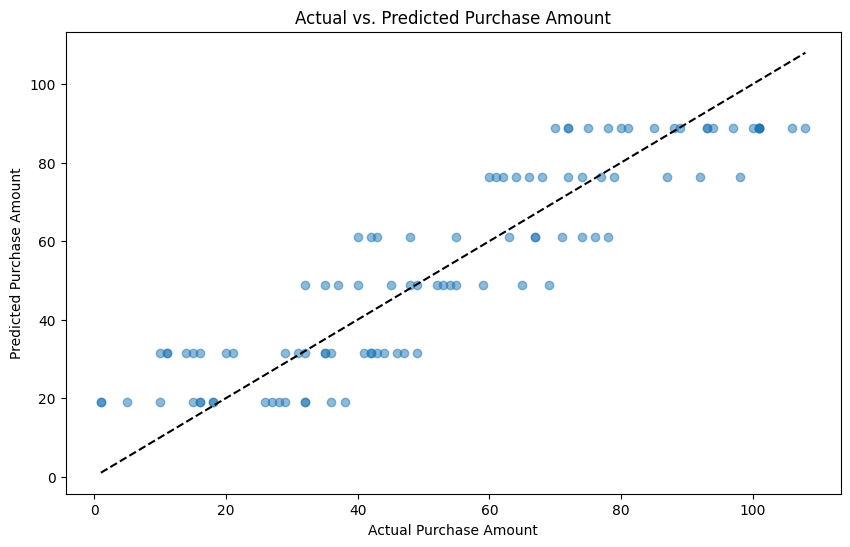

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# 予測されたpurchase_amountの計算
predicted_purchase = model.predict(
    df_encoded.drop('purchase_amount', axis=1),
    intercepts=True)

# purchase_amountの比較用にデータフレームを作成
predicted_purchase = pd.DataFrame(predicted_purchase, columns=['purchase_amount'])
predicted_purchase['actual'] = df['purchase_amount'].reset_index(drop=True)

# 平均二乗誤差(MSE)と決定係数(R^2)の計算
mse = mean_squared_error(predicted_purchase['actual'], predicted_purchase['purchase_amount'])
r2 = r2_score(predicted_purchase['actual'], predicted_purchase['purchase_amount'])
print("Mean squared error: ", mse)
print("R^2: ", r2)

# 予測値と実測値の散布図を描画
plt.figure(figsize=(10, 6))
plt.scatter(predicted_purchase['actual'], predicted_purchase['purchase_amount'], alpha=0.5)
plt.title('Actual vs. Predicted Purchase Amount')
plt.xlabel('Actual Purchase Amount')
plt.ylabel('Predicted Purchase Amount')
plt.plot(
    [predicted_purchase['actual'].min(), predicted_purchase['actual'].max()],
    [predicted_purchase['actual'].min(), predicted_purchase['actual'].max()],
    'k--')
plt.show()

## シンプルなビジネス事例
## データセットの紹介

よくある事例の1つです。売上と広告の関係性を、季節を考慮して検討しようというものです。

ここで利用するデータセットは、売上、広告費用、季節（春・夏・秋・冬）の3変数で構成されています。

    sales：売上
    AdvertisingCost：広告費用　※因果グラフ上はAdと表記
    Season：季節（春・夏・秋・冬）
    Spring：春、1Q（4月～6月）
    Summer：夏、2Q（7月～9月）
    Autumn：秋、3Q（10月～12月）
    Winter：冬、4Q（1月～3月）
季節（Season）が交絡因子です。

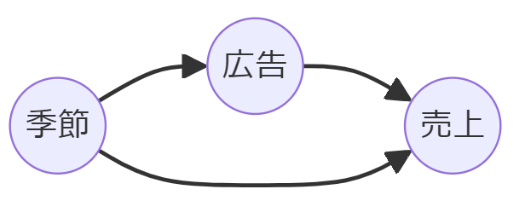

データセットは以下からダウンロードできます。

sample_data.csv

https://www.salesanalytics.co.jp/wc0m

## 準備

さっそく、必要なモジュールを読み込みます。

以下、コードです

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from semopy import Model
from semopy import plot

データセットを読み込みます。

以下、コードです。

In [9]:
# サンプルデータの読み込み
data = pd.read_csv(
    'sample_data.csv',
    index_col='YearQuarter'
)

display(data)

,AdvertisingCost,Season,Sales
YearQuarter,,,
2018Q1,173.948705,Spring,200.987813
2018Q2,236.607780,Summer,257.144920
2018Q3,155.783976,Autumn,195.558620
2018Q4,138.961569,Winter,173.043713
2019Q1,185.076895,Spring,194.853063
...,...,...,...
2066Q4,100.669615,Winter,154.127163
2067Q1,176.297145,Spring,203.448244
2067Q2,254.646060,Summer,275.155715


season（季節）変数がカテゴリカルデータのため、ダミーコード化（OneHotEncoding）します。

以下、コードです。

In [10]:
# ダミーコード化（対象：Season）
# OneHotEncoderのインスタンスを作成
encoder = OneHotEncoder(sparse=False)

# カテゴリ変数をエンコード
season_encoded = encoder.fit_transform(data[['Season']])
season_columns = encoder.get_feature_names_out(['Season'])

# エンコードされた変数をDataFrameに変換
data_encoded = pd.concat([
    data.drop(columns=['Season']),
    pd.DataFrame(
        season_encoded,
        columns=season_columns,
        index=data.index)],
    axis=1)

display(data_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,AdvertisingCost,Sales,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
YearQuarter,,,,,,
2018Q1,173.948705,200.987813,0.0,1.0,0.0,0.0
2018Q2,236.607780,257.144920,0.0,0.0,1.0,0.0
2018Q3,155.783976,195.558620,1.0,0.0,0.0,0.0
2018Q4,138.961569,173.043713,0.0,0.0,0.0,1.0
2019Q1,185.076895,194.853063,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
2066Q4,100.669615,154.127163,0.0,0.0,0.0,1.0
2067Q1,176.297145,203.448244,0.0,1.0,0.0,0.0
2067Q2,254.646060,275.155715,0.0,0.0,1.0,0.0


## SEM構築
## 今回構築するSEM

ここでは、2種類のSEMを構築し、適合度や予測精度などを見て、総合的に判断して、どちらを採用するのかを決めます。

今回構築するSEMは、次の2種類です。

    季節潜在変数を組む込んだSEM
    季節潜在変数を組み込まないSEM

    季節潜在変数を組む込んだSEM

季節変数をダミーコード化した後に、その季節ダミー変数群を表現する潜在変数として季節潜在変数を1つ作り、その潜在変数を売上やマーケティング変数につなげたSEMです。

ダミーコード化すると、たくさんの変数が生成されますが、潜在変数を組み込むことでシンプルになります。

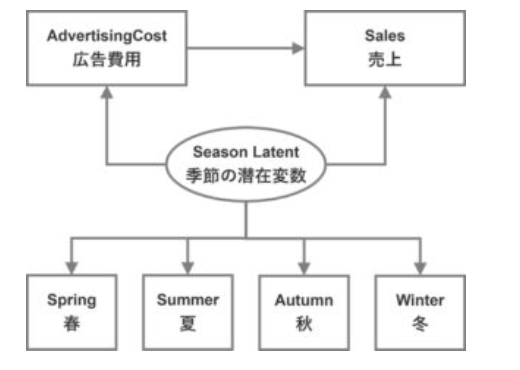

    季節潜在変数を組み込まないSEM

潜在変数を作らずに、複数の季節ダミー変数を直接、売上やマーケティング変数につなげたSEMです。

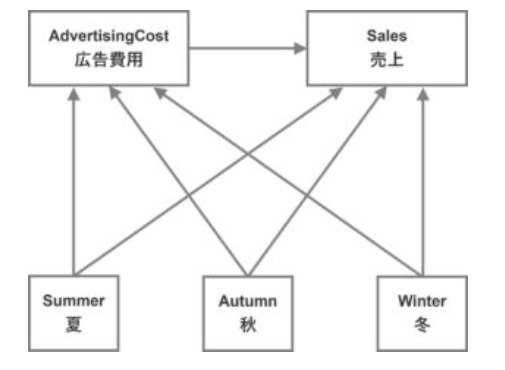

## 季節潜在変数を組む込んだSEM

モデルを定義し学習しSEMを構築、その結果の出力などをします。

以下、コードです。Season_Latentが季節の潜在変数です。

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,AdvertisingCost,~,Season_Latent,2.321375e+02,61.112424,3.798533,0.000146
1,Season_Spring,~,Season_Latent,1.000000e+00,-,-,-
2,Season_Summer,~,Season_Latent,1.187475e+00,0.374011,3.174974,0.001499
3,Season_Autumn,~,Season_Latent,1.190073e+00,0.374504,3.177733,0.001484
4,Season_Winter,~,Season_Latent,-3.606008e+00,1.048356,-3.43968,0.000582
5,Sales,~,AdvertisingCost,8.372955e-01,0.019592,42.736812,0.0
6,Sales,~,Season_Latent,1.274481e+01,8.630421,1.476731,0.139748
7,AdvertisingCost,~~,AdvertisingCost,1.738388e+03,214.849108,8.091203,0.0
8,Season_Latent,~~,Season_Latent,1.441923e-02,0.007477,1.928509,0.053792
9,Sales,~~,Sales,1.279257e+02,12.798226,9.995578,0.0


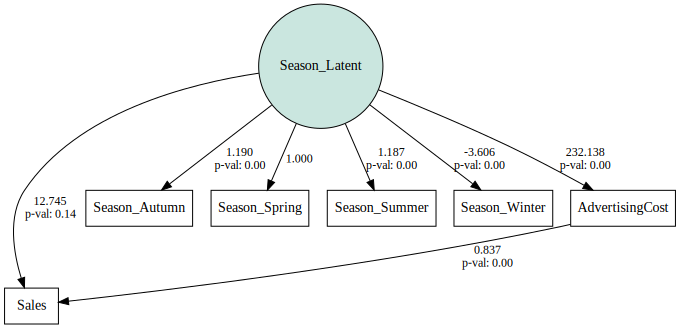

In [11]:
# モデル記述
model_desc = """
# 測定モデル
Season_Latent =~ Season_Spring + Season_Summer + Season_Autumn + Season_Winter

# 構造モデル
Sales ~ AdvertisingCost + Season_Latent
AdvertisingCost ~ Season_Latent
"""
model = Model(model_desc)

# モデルの構築
model.load_dataset(data_encoded)
results = model.fit()

# 結果の取得
estimates = model.inspect()
display(estimates)

# DAGの表示
plot.semplot(model, 'output_semplot.png')

モデルの評価します。

先ずは、適合度指標です。

以下、コードです。

In [12]:
# 適合度の計算
stats = calc_stats(model)
display(stats.T)

,Value
DoF,8.000000
DoF Baseline,15.000000
chi2,1126.962305
chi2 p-value,0.000000
chi2 Baseline,1806.899769
CFI,0.375544
GFI,0.376301
AGFI,-0.169436
NFI,0.376301
TLI,-0.170855


以下の基準で考えると、あまり良いとは言えません。

    Chi-Square検定: p値が大きい（通常は0.05以上）と、モデルがデータに適合していると考えられる。
    CFI（Comparative Fit Index）: 値が0.90以上であれば良好とされる。
    RMSEA（Root Mean Square Error of Approximation）: 値が0.05以下であれば良好とされる。

次に、予測精度です。

以下、コードです。

Mean squared error:  124.46502307141152
R^2:  0.9306888496195667


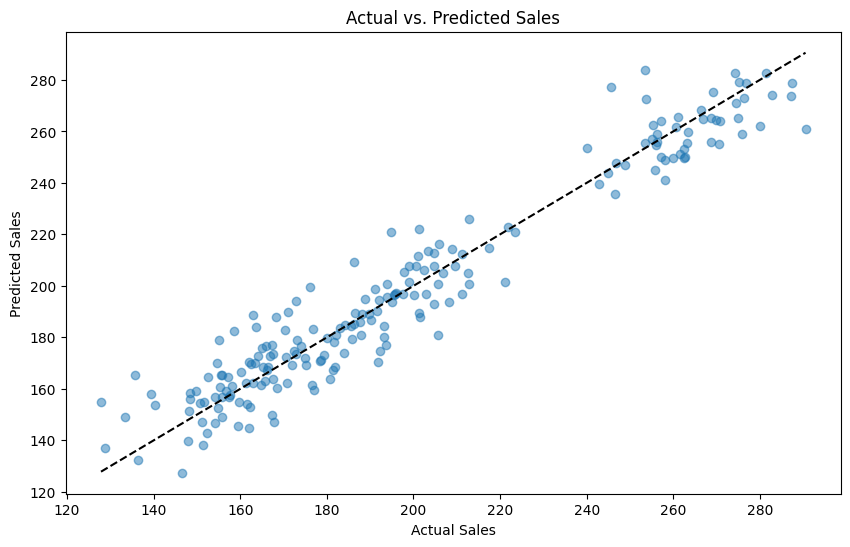

In [13]:
# 予測されたSalesの計算
predicted_sales = model.predict(
    data_encoded[[
        'AdvertisingCost',
        'Season_Spring',
        'Season_Summer',
        'Season_Winter'
    ]],
    intercepts=True)

# 元のSalesデータと予測されたSalesデータの比較
data['PredictedSales'] = predicted_sales['Sales']

# 平均二乗誤差(MSE)と決定係数(R^2)の計算
mse = mean_squared_error(data['Sales'], data['PredictedSales'])
r2 = r2_score(data['Sales'], data['PredictedSales'])
print("Mean squared error: ", mse)
print("R^2: ", r2)

# 予測値と実測値の散布図を描画
plt.figure(figsize=(10, 6))
plt.scatter(data['Sales'], data['PredictedSales'], alpha=0.5)
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.plot(
    [data['Sales'].min(), data['Sales'].max()],
    [data['Sales'].min(), data['Sales'].max()],
    'k--')
plt.show()

予測精度は悪くはありません。

## 季節潜在変数を組み込まないSEM

モデルを定義し学習しSEMを構築、その結果の出力などをします。

以下、コードです。

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,AdvertisingCost,~,Season_Summer,72.280533,2.842817,25.425668,0.000000e+00
1,AdvertisingCost,~,Season_Winter,-47.647995,2.842817,-16.760835,0.000000e+00
2,AdvertisingCost,~,Season_Autumn,-28.835233,2.842817,-10.143188,0.000000e+00
3,Sales,~,AdvertisingCost,0.548121,0.050862,10.776596,0.000000e+00
4,Sales,~,Season_Summer,25.471018,4.206765,6.054775,1.406139e-09
5,Sales,~,Season_Winter,-15.523129,3.170902,-4.895493,9.805963e-07
6,Sales,~,Season_Autumn,-7.669915,2.516415,-3.047953,2.304057e-03
7,AdvertisingCost,~~,AdvertisingCost,202.040273,20.204027,10.000000,0.000000e+00
8,Sales,~~,Sales,104.534048,10.453405,10.000000,0.000000e+00


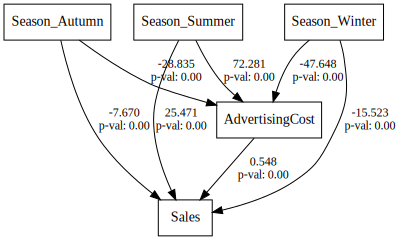

In [14]:
# モデル記述
model_desc = """
# 構造モデル
Sales ~ AdvertisingCost + Season_Summer + Season_Winter + Season_Autumn
AdvertisingCost ~ Season_Summer + Season_Winter + Season_Autumn
"""
model = Model(model_desc)

# モデルの構築
model.load_dataset(data_encoded)
results = model.fit()

# 結果の取得
estimates = model.inspect()
display(estimates)

# DAGの表示
plot.semplot(model, 'output_semplot.png')

モデルの評価します。

先ずは、適合度指標です。

以下、コードです。

In [15]:
# 適合度の計算
stats = calc_stats(model)
display(stats.T)

,Value
DoF,6.000000e+00
DoF Baseline,1.300000e+01
chi2,4.264162e-05
chi2 p-value,1.000000e+00
chi2 Baseline,1.161127e+03
CFI,1.005226e+00
GFI,1.000000e+00
AGFI,9.999999e-01
NFI,1.000000e+00
TLI,1.011323e+00


以下の基準で考えると、上手く適合していると判断できそうです。

    Chi-Square検定: p値が大きい（通常は0.05以上）と、モデルがデータに適合していると考えられる。
    CFI（Comparative Fit Index）: 値が0.90以上であれば良好とされる。
    RMSEA（Root Mean Square Error of Approximation）: 値が0.05以下であれば良好とされる。

次に、予測精度です。

以下、コードです。

Mean squared error:  109.39031492731816
R^2:  0.9390835402509814


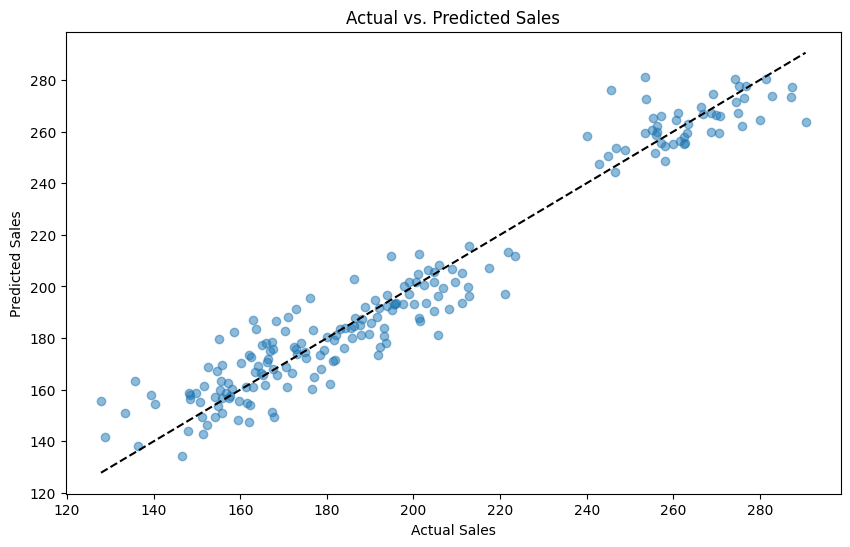

In [16]:
# 予測されたSalesの計算
predicted_sales = model.predict(
    data_encoded[[
        'AdvertisingCost',
        'Season_Spring',
        'Season_Summer',
        'Season_Winter'
    ]],
    intercepts=True)

# 元のSalesデータと予測されたSalesデータの比較
data['PredictedSales'] = predicted_sales['Sales']

# 平均二乗誤差(MSE)と決定係数(R^2)の計算
mse = mean_squared_error(data['Sales'], data['PredictedSales'])
r2 = r2_score(data['Sales'], data['PredictedSales'])
print("Mean squared error: ", mse)
print("R^2: ", r2)

# 予測値と実測値の散布図を描画
plt.figure(figsize=(10, 6))
plt.scatter(data['Sales'], data['PredictedSales'], alpha=0.5)
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.plot(
    [data['Sales'].min(), data['Sales'].max()],
    [data['Sales'].min(), data['Sales'].max()],
    'k--')
plt.show()

予測精度は悪くはありません。

今回のケースですと、潜在変数を含めない方がいい結果となりました。

ちなみに、質的変数が順序データの場合、ダミーコード化後に潜在変数を組み込んだ方がいい結果になることが多いです。

## 介入シミュレーション

構築したSEMを使い、広告に介入することで、売上がどのように変化するのかを見ていきます。

売上の大きい夏だけ広告費を20%アップする介入を行います。

以下、コードです。

In [17]:
# 介入：夏だけ広告費を20%増加させる
data_intervened = data_encoded.copy()
data_intervened.loc[
    data_intervened['Season_Summer'] == 1, 'AdvertisingCost'
    ] *= 1.2

# 介入後のSalesの予測
predicted_sales_intervention = model.predict(
    data_intervened[[
        'AdvertisingCost',
        'Season_Spring',
        'Season_Summer',
        'Season_Winter'
    ]],
    intercepts=True)

# 結果の比較
comparison = pd.DataFrame({
    'Pre-Intervention': data['Sales'],
    'Post-Intervention': predicted_sales_intervention['Sales'],
})

display(comparison.describe())

,Pre-Intervention,Post-Intervention
count,200.000000,200.000000
mean,198.637004,206.067692
std,42.482549,53.319330
min,127.828214,134.471209
25%,165.031539,167.659240
50%,188.450682,186.163884
75%,227.693133,229.226613
max,290.559525,314.361700


以下、実行結果です。Pre-Interventionが介入していない場合（現状）で、 Post-Interventionが介入した場合（反事仮想）です。



分布状況をグラフで確認します。

以下、コードです。

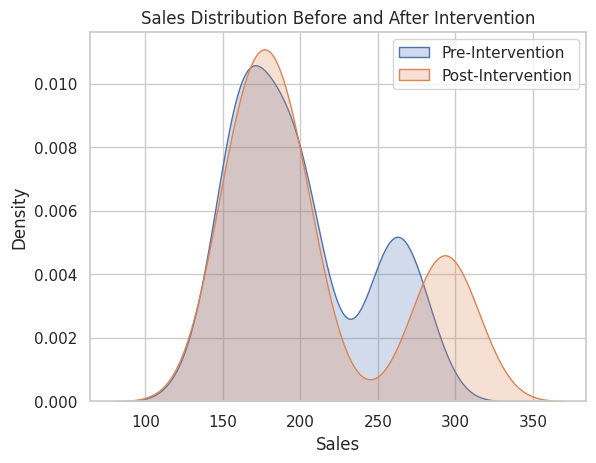

In [18]:
# 分布の可視化
sns.set(style='whitegrid')
sns.kdeplot(
    comparison['Pre-Intervention'],
    label='Pre-Intervention',
    fill=True)
sns.kdeplot(
    comparison['Post-Intervention'],
    label='Post-Intervention',
    fill=True)
plt.legend()
plt.title('Sales Distribution Before and After Intervention')
plt.xlabel('Sales')
plt.ylabel('Density')
plt.show()

## 目的変数が質的変数の場合の課題
## SEMにおける質的変数の問題点

質的変数を目的変数として扱う場合、SEMの線形回帰モデルはこれを量的変数として扱うため、誤った推定をする可能性があります。

このため、特別な処理が必要です。

質的変数を適切に扱うためには、次のようなアプローチがあります。

    R言語のlavaanライブラリを使用する：Rのlavaanは質的変数に対する柔軟な処理が可能です。
    ロジスティック回帰モデルを使用する：各パスごとに独立して推定することで、質的変数を目的変数として扱えます。

url: https://lavaan.ugent.be/

## Pythonでの実装例

ロジスティック回帰モデルを使用して、各パスを推定する、Pythonのコード例を示します。

## サンプルデータセット

目的変数（今回は、purchase_decision）が質的データの例を考えていきます。

    purchase_decision：購入の有無（1:購入、0:非購入）
    gender：性別
    job：職業

まず、サンプルデータを作ります。

以下、コードです。

In [19]:
import pandas as pd
import numpy as np

# サンプルデータの生成
# ランダムシードの設定
np.random.seed(42)

# サンプルデータの作成
data = {'gender': np.random.choice(['male', 'female'], 100),
        'job': np.random.choice(['engineer', 'doctor', 'shopkeeper'], 100),
        'purchase_letent': np.random.randint(10, 50, 100)}

# データフレームに変換
df = pd.DataFrame(data)

# purchase_letent列の値を調整
df['purchase_letent'] += (
    df['gender'].map({'male': 100, 'female': 0}) +
    df['job'].map({'engineer': 100, 'doctor': 20, 'shopkeeper': -20})
)

# purchase_letentの値をもとにpurchase_decisionの変数を作成
# purchase_letentが平均以上の場合は1、それ以外は0とする
df['purchase_decision'] = (df['purchase_letent'] >= df['purchase_letent'].mean()).astype(int)
df = df.drop('purchase_letent', axis=1)

display(df)

,gender,job,purchase_decision
0,male,shopkeeper,1
1,female,doctor,0
2,male,doctor,1
3,male,doctor,1
4,male,doctor,1
...,...,...,...
95,female,engineer,1
96,female,doctor,0
97,female,engineer,1
98,female,engineer,1


## 質的変数のダミーコーディング（OneHotEncoding）

まず、以下の質的変数をコーディングします。

    性別：ダミーコーディング（OneHotEncoding）
    職業：ダミーコーディング（OneHotEncoding）

以下、コードです。

In [20]:
from sklearn.preprocessing import OneHotEncoder

# ダミーコーディング（OneHotEncoding）
# OneHotEncoderのインスタンスを作成
encoder = OneHotEncoder(drop='first', sparse=False)

# カテゴリ変数をエンコード
df_encoded = encoder.fit_transform(df[['gender', 'job']])

# エンコード後の変数名を取得
encoded_columns = encoder.get_feature_names_out(['gender', 'job'])

# エンコードされた変数をDataFrameに変換
df_encoded = pd.DataFrame(
    df_encoded,
    columns=encoded_columns
)

# purchase_decision列を追加
df_encoded = pd.concat([
    df_encoded,
    df[['purchase_decision']]
    ], axis=1
)

display(df_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,gender_male,job_engineer,job_shopkeeper,purchase_decision
0,1.0,0.0,1.0,1
1,0.0,0.0,0.0,0
2,1.0,0.0,0.0,1
3,1.0,0.0,0.0,1
4,1.0,0.0,0.0,1
...,...,...,...,...
95,0.0,1.0,0.0,1
96,0.0,0.0,0.0,0
97,0.0,1.0,0.0,1
98,0.0,1.0,0.0,1


## SEMモデルの構築

semopyを使用してモデルを定義し、構造だけ視覚的に確認します。

以下、コードです。



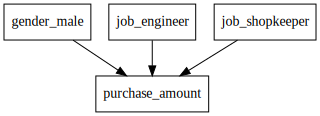

In [21]:
from semopy import Model

# SEMモデルの定義
model_desc = """
purchase_amount ~ gender_male + job_engineer + job_shopkeeper
"""
model = Model(model_desc)

# DAGの表示
plot.semplot(model, 'output_semplot.png')

このSEMは見るだけです。

推定は、別途にロジスティック回帰モデルを構築して求めます。

以下、コードです。

In [22]:
from sklearn.linear_model import LogisticRegression

# データを説明変数Xと目的変数yに分離
X = df_encoded.drop('purchase_decision', axis=1)
y = df_encoded['purchase_decision']

# ロジスティック回帰モデル
logistic_model = LogisticRegression()
logistic_model.fit(X, y)

# パラメータと係数、切片を変数名と一緒に表示
coef = logistic_model.coef_
intercept = logistic_model.intercept_

print("ロジスティック回帰モデルの係数\n", dict(zip(X.columns, coef[0])))
print("ロジスティック回帰モデルの切片\n", intercept[0])

ロジスティック回帰モデルの係数
 {'gender_male': 2.8323259421231866, 'job_engineer': 2.868383406692725, 'job_shopkeeper': -1.276822135219078}
ロジスティック回帰モデルの切片
 -0.9264420754349728


scikit-learn（sklearn）のロジスティック回帰モデルは、係数のp値などの出力がないので、別途計算します。

以下、コードです。

In [23]:
import scipy.stats as stats
# p値の計算
# 仮定として、各係数が正規分布に従うとして計算
# w = coef / standard errorから計算し、p値を求める
params = np.append(logistic_model.intercept_, logistic_model.coef_)
predictions = logistic_model.predict_proba(X)[:, 1]

# デザインマトリックスの作成
X_design = np.hstack([np.ones((X.shape[0], 1)), X])

# V = diag(p * (1 - p))の計算
V = np.diag(predictions * (1 - predictions))

# (X^T * V * X)^(-1)の計算
cov_logit = np.linalg.inv(X_design.T @ V @ X_design)

# 標準誤差の計算
se = np.sqrt(np.diag(cov_logit))

# w値の計算
w_values = params / se

# p値の計算
p_values = 2 * (1 - stats.norm.cdf(np.abs(w_values)))

# 結果をデータフレームにまとめる
results_df = pd.DataFrame({
    'Variable': ['Intercept'] + list(X.columns),
    'Coefficient': params,
    'Standard Error': se,
    'W-Value': w_values,
    'P-Value': p_values
})

# 結果の表示
display(results_df)

,Variable,Coefficient,Standard Error,W-Value,P-Value
0,Intercept,-0.926442,0.560585,-1.652633,0.098406
1,gender_male,2.832326,0.650224,4.355924,0.000013
2,job_engineer,2.868383,0.835117,3.434709,0.000593
3,job_shopkeeper,-1.276822,0.671735,-1.900782,0.057331


この結果は、ロジスティック回帰モデルの推定結果を示しています。各変数の係数、標準誤差、W値（z値）、およびp値が含まれています。

以下は各項目の解釈です。

    Intercept（切片）

切片の係数は-0.926442であり、これは他の変数がすべて0のときのロジット（対数オッズ）を示します。

p値が0.098406であり、一般的な有意水準（0.05）よりも大きいため、統計的に有意ではありません。

    gender_male

男性（gender_male）の係数は2.832326であり、これは男性が女性に比べて購入決定をするオッズが高いことを示します。

p値が0.000013であり、非常に小さいため、統計的に有意です。

    job_engineer

エンジニア（job_engineer）の係数は2.868383であり、これはエンジニアが他の職業に比べて購入決定をするオッズが高いことを示します。

p値が0.000593であり、非常に小さいため、統計的に有意です。

    job_shopkeeper

個人商店の店主（job_shopkeeper）の係数は-1.276822であり、これは店主が他の職業に比べて購入決定をするオッズが低いことを示します。

p値が0.057331であり、一般的な有意水準（0.05）に近いですが、わずかに大きいため、統計的に有意ではないと見なされます。

全体として、男性とエンジニアは購入決定をするオッズが高く、統計的に有意であることが示されています。

一方、店主は購入決定をするオッズが低いですが、統計的に有意ではない可能性があります。

DAGを描きます。

以下、コードです。

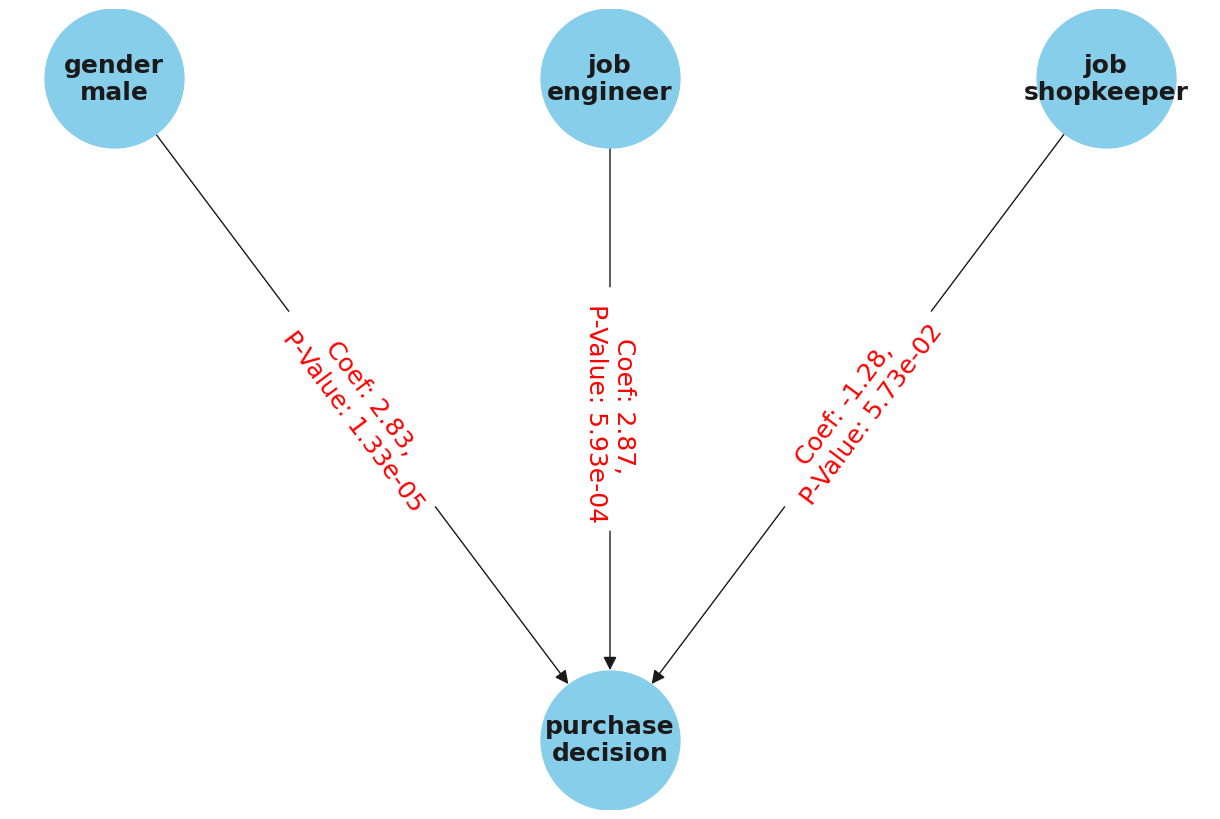

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

# 有向グラフのインスタンスを作成
G = nx.DiGraph()

# ノードを追加
nodes = [
    'gender\nmale',
    'job\nengineer',
    'job\nshopkeeper',
    'purchase\ndecision'
]
G.add_nodes_from(nodes)

# 各変数の係数とp値を取得
edges = [
    ('gender\nmale', 'purchase\ndecision', results_df.loc[results_df['Variable'] == 'gender_male', ['Coefficient', 'P-Value']].values[0]),
    ('job\nengineer', 'purchase\ndecision', results_df.loc[results_df['Variable'] == 'job_engineer', ['Coefficient', 'P-Value']].values[0]),
    ('job\nshopkeeper', 'purchase\ndecision', results_df.loc[results_df['Variable'] == 'job_shopkeeper', ['Coefficient', 'P-Value']].values[0])
]

# エッジを追加
for edge in edges:
    G.add_edge(edge[0], edge[1], label=f"Coef: {edge[2][0]:.2f}, \n P-Value: {edge[2][1]:.2e}")

# ノードのカスタム位置
pos = {
    'gender\nmale': (0, 1),
    'job\nengineer': (1, 1),
    'job\nshopkeeper': (2, 1),
    'purchase\ndecision': (1, 0)
}

# グラフを描画
plt.figure(figsize=(12, 8))
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=10000,
    node_color='skyblue',
    font_size=18,
    font_weight='bold',
    arrowsize=20
)

edge_labels = nx.get_edge_attributes(
    G,
    'label'
)

nx.draw_networkx_edge_labels(
    G,
    pos,
    edge_labels=edge_labels,
    font_color='red',
    font_size=18
)

plt.show()

このモデルの精度評価をします。

以下、コードです。

In [25]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)

# 予測値の計算
y_pred = logistic_model.predict(X)

# 精度評価の計算
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)

# 評価指標の表示
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.95
Precision: 0.9242424242424242
Recall: 1.0
F1 Score: 0.9606299212598425


このモデルの精度評価結果は以下の通りです。

    Accuracy (正解率)
モデルが正しく予測した割合です。
95%の正解率は非常に高いことを示しています。

    Precision (適合率)

モデルが「購入する」と予測したうち、実際に購入した割合です。
約92.4%の適合率は、モデルが「購入する」と予測した場合、その予測が正しいことが多いことを示しています。

    Recall (再現率)
実際に購入した人のうち、モデルが正しく「購入する」と予測した割合です。
再現率が1.0（100%）であることは、実際に購入したすべての人をモデルが正しく予測できていることを示しています。

    F1 Score

適合率と再現率の調和平均です。
F1スコアが約96.1%であることは、モデルがバランスの取れた性能を持っていることを示しています。

この結果から、モデルは非常に高い精度で購入の有無を予測できていることがわかります。

## まとめ

今回は、質的変数を含む因果モデルの構築と解析方法について学びました。

質的変数は、順序データと非順序データに分類され、それぞれ適切なコーディングが必要です。

具体的な例を通じて、semopyを用いたモデルの構築方法と評価方法を紹介しました。

また、質的変数が目的変数の場合の課題についても触れ、R言語のlavaanライブラリやロジスティック回帰モデルの利用を提案しました。